<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.FIVE_MIN

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))

In [4]:
d.data

,product,epoch,product_id
2019-01-01 00:00:00,C,1546300800,6077
2019-01-01 00:05:00,A,1546301100,6466
2019-01-01 00:10:00,B,1546301400,9915
2019-01-01 00:15:00,B,1546301700,3801
2019-01-01 00:20:00,B,1546302000,35
...,...,...,...
2019-01-11 23:40:00,D,1547250000,6575
2019-01-11 23:45:00,D,1547250300,1265
2019-01-11 23:50:00,C,1547250600,7790
2019-01-11 23:55:00,C,1547250900,4510


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

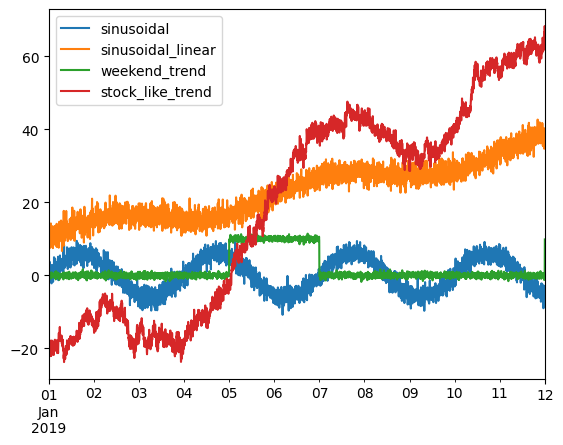

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,product,epoch,product_id,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,C,1546300800,6077,0.648688,10.548931,0.258164,-19.860072
2019-01-01 00:05:00,A,1546301100,6466,-0.182989,7.463113,-0.245530,-18.531246
2019-01-01 00:10:00,B,1546301400,9915,0.620196,11.805676,0.320712,-19.536079
2019-01-01 00:15:00,B,1546301700,3801,-0.254738,11.594776,0.017697,-21.823774
2019-01-01 00:20:00,B,1546302000,35,0.795106,9.564450,0.143601,-18.189205
...,...,...,...,...,...,...,...
2019-01-11 23:40:00,D,1547250000,6575,-5.630588,34.704129,-1.257301,64.245100
2019-01-11 23:45:00,D,1547250300,1265,-5.437712,38.679540,0.211825,66.649384
2019-01-11 23:50:00,C,1547250600,7790,-3.858769,38.964017,0.287810,64.928902
2019-01-11 23:55:00,C,1547250900,4510,-3.663684,40.158874,-0.406732,68.309829


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,product,epoch,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,C,1546300800,10.548931,0.258164,-19.860072
2019-01-01 00:05:00,A,1546301100,7.463113,-0.245530,-18.531246
2019-01-01 00:10:00,B,1546301400,11.805676,0.320712,-19.536079
2019-01-01 00:15:00,B,1546301700,11.594776,0.017697,-21.823774
2019-01-01 00:20:00,B,1546302000,9.564450,0.143601,-18.189205
...,...,...,...,...,...
2019-01-11 23:40:00,D,1547250000,34.704129,-1.257301,64.245100
2019-01-11 23:45:00,D,1547250300,38.679540,0.211825,66.649384
2019-01-11 23:50:00,C,1547250600,38.964017,0.287810,64.928902
2019-01-11 23:55:00,C,1547250900,40.158874,-0.406732,68.309829


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,product,epoch,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,A,1546300800,9.640334,-0.150310,-19.223170
2019-01-01 00:05:00,D,1546301100,8.293865,0.571624,-21.983513
2019-01-01 00:10:00,C,1546301400,12.299267,0.307782,-20.059458
2019-01-01 00:15:00,A,1546301700,7.009455,0.332521,-19.575762
2019-01-01 00:20:00,B,1546302000,9.218003,0.116209,-22.261907
...,...,...,...,...,...
2019-01-12 00:45:00,D,1547253900,37.390729,10.232626,75.121640
2019-01-12 00:50:00,D,1547254200,37.912429,9.744196,74.662549
2019-01-12 00:55:00,A,1547254500,37.487873,9.755535,75.102304
2019-01-12 01:00:00,B,1547254800,39.344766,10.002266,73.361580
